In [1]:
import os
os.chdir("C:\\Users\\Hi\\Downloads\\ML Exercise")

### Import Necessary Libraries

Now, as intial start-up of the problem solving approach, we need to install all the necessary packages and libraries to solve this problem statement.

In [193]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import re
import pickle

In [105]:
from category_encoders import TargetEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA

### Import Data

After installing the packages and libraries required for solving the problem, our main important task is to import the required data for solving this problem. Data can be of any format. But in this scenario, we are reading the Mortage dataset excel files.

In [50]:
df1 = pd.read_excel('MortgageDataset1.xlsx')
df2 = pd.read_excel('MortgageDataset2.xlsx')

### Dropping Initial Phase data

Here, I'm dropping or removing all the columns which have missing values that are greater than 50%. I'm removing all those columns because, a lot of missing values in the dataset will not give best results for the developed model.

In [51]:
cols1 = df1.columns[df1.isnull().mean()>0.5]
cols2 = df2.columns[df2.isnull().mean()>0.5]
df1.drop(cols1, axis=1, inplace=True)
df2.drop(cols2, axis=1, inplace=True)

In [52]:
df1.shape, df2.shape

((6155, 47), (6459, 67))

In [53]:
df2.isnull().sum().sort_values(ascending=False)

rate_spread                                 2310
interest_rate                               2284
property_value                              1396
loan_to_value_ratio                         1396
debt_to_income_ratio                        1320
                                            ... 
applicant_credit_score_type                    0
total_units                                    0
manufactured_home_land_property_interest       0
manufactured_home_secured_property_type        0
activity_year                                  0
Length: 67, dtype: int64

Since, dataset-2 has 20 columns more than dataset-1, we have no other choice but to remove some of the columns from dataset-1 and append both the tables based on common columns.

In [54]:
a = np.intersect1d(df2.columns, df1.columns)
a

array(['action_taken', 'activity_year', 'applicant_credit_score_type',
       'balloon_payment', 'business_or_commercial_purpose',
       'co-applicant_credit_score_type', 'conforming_loan_limit',
       'construction_method', 'county_code', 'debt_to_income_ratio',
       'denial_reason-1', 'derived_dwelling_category',
       'derived_loan_product_type', 'derived_msa-md',
       'ffiec_msa_md_median_family_income', 'hoepa_status', 'income',
       'initially_payable_to_institution', 'interest_only_payment',
       'interest_rate', 'lien_status', 'loan_amount', 'loan_purpose',
       'loan_term', 'loan_to_value_ratio', 'loan_type',
       'manufactured_home_land_property_interest',
       'manufactured_home_secured_property_type', 'negative_amortization',
       'occupancy_type', 'open-end_line_of_credit',
       'other_nonamortizing_features', 'preapproval', 'property_value',
       'rate_spread', 'reverse_mortgage', 'state_code',
       'submission_of_application', 'total_units',
    

In [55]:
df2_new = df2[['action_taken', 'activity_year', 'applicant_credit_score_type',
       'balloon_payment', 'business_or_commercial_purpose',
       'co-applicant_credit_score_type', 'conforming_loan_limit',
       'construction_method', 'county_code', 'debt_to_income_ratio',
       'denial_reason-1', 'derived_dwelling_category',
       'derived_loan_product_type', 'derived_msa-md',
       'ffiec_msa_md_median_family_income', 'hoepa_status', 'income',
       'initially_payable_to_institution', 'interest_only_payment',
       'interest_rate', 'lien_status', 'loan_amount', 'loan_purpose',
       'loan_term', 'loan_to_value_ratio', 'loan_type',
       'manufactured_home_land_property_interest',
       'manufactured_home_secured_property_type', 'negative_amortization',
       'occupancy_type', 'open-end_line_of_credit',
       'other_nonamortizing_features', 'preapproval', 'property_value',
       'rate_spread', 'reverse_mortgage', 'state_code',
       'submission_of_application', 'total_units',
       'tract_median_age_of_housing_units',
       'tract_minority_population_percent',
       'tract_one_to_four_family_homes', 'tract_owner_occupied_units',
       'tract_population', 'tract_to_msa_income_percentage']]

In [56]:
df_final = df1.append(df2_new, ignore_index=True)

## Data Pre-Processing Stages

#### Remove Columns with Zero Variance

In [57]:
cols_del = ['activity_year','preapproval','reverse_mortgage','negative_amortization','other_nonamortizing_features','submission_of_application','initially_payable_to_institution','origination_charges','total_loan_costs']
df_final.drop(cols_del, axis=1, inplace=True)

## Exploratory Data Analysis

We will explore a Data set and perform the exploratory data analysis. The major topics to be covered are below:

* Handle Missing value
* Removing duplicates
* Outlier Treatment
* Normalizing and Scaling( Numerical Variables)
* Encoding Categorical variables( Dummy Variables)
* Bivariate Analysis

### Basic Data Exploration

In this step, we will perform the below operations to check what the data set comprises of. We will check the below things:

– head of the dataset
– the shape of the dataset
– info of the dataset
– summary of the dataset

The head function will tell you the top records in the data set. By default, python shows you only the top 5 records.
The shape attribute tells us a number of observations and variables we have in the data set. It is used to check the dimension of data. The Mortgage data set has 12614 observations and 38 variables in the data set.

In [58]:
df_final.head()

,derived_msa-md,state_code,county_code,conforming_loan_limit,derived_loan_product_type,derived_dwelling_category,action_taken,loan_type,loan_purpose,lien_status,...,applicant_credit_score_type,co-applicant_credit_score_type,denial_reason-1,tract_population,tract_minority_population_percent,ffiec_msa_md_median_family_income,tract_to_msa_income_percentage,tract_owner_occupied_units,tract_one_to_four_family_homes,tract_median_age_of_housing_units
0,99999,NY,36039,C,VA:First Lien,Single Family (1-4 Units):Site-Built,1,3,1,1,...,2,1,10,2765,6.84,66200,111,679,1164,73
1,10580,NY,36095,C,VA:First Lien,Single Family (1-4 Units):Site-Built,1,3,1,1,...,3,10,10,5400,5.67,89900,79,1583,2362,48
2,39100,NY,36071,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,1,1,1,1,...,2,3,10,10019,35.25,96700,121,2620,3255,27
3,10580,NY,36001,C,FHA:First Lien,Single Family (1-4 Units):Site-Built,1,2,1,1,...,2,3,10,3343,12.23,89900,59,494,1335,76
4,99999,NY,36039,C,FHA:First Lien,Single Family (1-4 Units):Manufactured,1,2,1,1,...,3,10,10,3939,5.28,66200,105,998,2029,42


In [59]:
df_final.shape

(12614, 38)

**info()** is used to check the Information about the data and the datatypes of each respective attribute.

In [60]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12614 entries, 0 to 12613
Data columns (total 38 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   derived_msa-md                            12614 non-null  int64  
 1   state_code                                12603 non-null  object 
 2   county_code                               12614 non-null  int64  
 3   conforming_loan_limit                     12600 non-null  object 
 4   derived_loan_product_type                 12614 non-null  object 
 5   derived_dwelling_category                 12614 non-null  object 
 6   action_taken                              12614 non-null  int64  
 7   loan_type                                 12614 non-null  int64  
 8   loan_purpose                              12614 non-null  int64  
 9   lien_status                               12614 non-null  int64  
 10  open-end_line_of_credit           

### Handling Missing Values

We can see that we have various missing values in the respective columns. There are various ways of treating your missing values in the data set. And which technique to use when is actually dependent on the type of data you are dealing with.

* **Drop the missing values:** In this case, we drop the missing values from those variables. In case there are very few missing values you can drop those values.
* **Impute with mean value:** For the numerical column, you can replace the missing values with mean values. Before replacing with mean value, it is advisable to check that the variable shouldn’t have extreme values .i.e. outliers.
* **Impute with median value:** For the numerical column, you can also replace the missing values with median values. In case you have extreme values such as outliers it is advisable to use the median approach.
* **Impute with mode value:** For the categorical column, you can replace the missing values with mode values i.e the frequent ones.

In this exercise, we will replace the numerical columns with median values and for categorical columns, we will drop the missing values feature if we have more than 50% of missing values

In [61]:
df_final.isnull().sum().sort_values(ascending=False)

rate_spread                                 2310
interest_rate                               2284
loan_to_value_ratio                         1396
property_value                              1396
debt_to_income_ratio                        1320
income                                        90
conforming_loan_limit                         14
state_code                                    11
derived_loan_product_type                      0
derived_dwelling_category                      0
action_taken                                   0
loan_type                                      0
loan_purpose                                   0
hoepa_status                                   0
lien_status                                    0
open-end_line_of_credit                        0
business_or_commercial_purpose                 0
loan_amount                                    0
county_code                                    0
tract_median_age_of_housing_units              0
interest_only_paymen

In [62]:
df_final['rate_spread'].fillna(df_final['rate_spread'].median(), inplace=True)
df_final['interest_rate'].fillna(df_final['interest_rate'].median(), inplace=True)
df_final['loan_to_value_ratio'].fillna(df_final['loan_to_value_ratio'].median(), inplace=True)
df_final['property_value'].fillna(df_final['property_value'].median(), inplace=True)
df_final['income'].fillna(df_final['income'].median(), inplace=True)
df_final['debt_to_income_ratio'].fillna(df_final['debt_to_income_ratio'].mode()[0], inplace=True)
df_final['state_code'].fillna(df_final['state_code'].mode()[0], inplace=True)
df_final['conforming_loan_limit'].fillna(df_final['conforming_loan_limit'].mode()[0], inplace=True)

### Handling Duplicate Records

In [63]:
duplicate = df_final.duplicated()
print(duplicate.sum())
df_final[duplicate].head()

11


,derived_msa-md,state_code,county_code,conforming_loan_limit,derived_loan_product_type,derived_dwelling_category,action_taken,loan_type,loan_purpose,lien_status,...,applicant_credit_score_type,co-applicant_credit_score_type,denial_reason-1,tract_population,tract_minority_population_percent,ffiec_msa_md_median_family_income,tract_to_msa_income_percentage,tract_owner_occupied_units,tract_one_to_four_family_homes,tract_median_age_of_housing_units
7791,36740,FL,12095,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,3,1,32,1,...,2,10,3,26002,45.73,65100,185,6602,8267,12
8039,10580,NY,36093,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,3,1,1,1,...,2,10,9,1995,42.71,89900,61,294,1187,76
8878,36740,FL,12095,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,3,1,32,1,...,2,10,3,2517,13.19,65100,223,750,873,49
10510,48424,FL,12099,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,4,1,32,1,...,9,9,10,1930,21.61,75400,166,673,873,0
10662,10580,NY,36093,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,3,1,32,1,...,2,2,3,4838,7.28,89900,94,1351,1789,65


Since we have **11** duplicate records in the data, we will remove this from the data set so that we get only distinct records. Post removing the duplicate, we will check whether the duplicates have been removed from the data set or not.

In [64]:
df_final.drop_duplicates(inplace=True)

In [65]:
dpl = df_final.duplicated()
dpl.sum()

0

##### Target Variable

In [76]:
target = 'action_taken'
df_final[target].value_counts()

Loan Originated                           9985
Application Denied                        1624
Application withdrawn by the Applicant     521
Application Approved but not Accepted      345
File closed for Incompleteness             128
Name: action_taken, dtype: int64

In [75]:
df_final[target] = df_final[target].map({1:'Loan Originated', 2:'Application Approved but not Accepted', 3:'Application Denied', 4:'Application withdrawn by the Applicant', 5:'File closed for Incompleteness', 6:'Purchased Loan', 7:'Preapproval Request Denied', 8:'Preapproval request approved but not accepted'})

#### Profiling the Data

This is a very useful tool that can be used by analysts. It generates an analysis report on the data frame, and helps you better understand the correlation between variables.
To generate a Pandas Profiling report, run the following lines of code:

In [33]:
import pandas_profiling as pp
from pandas_profiling import ProfileReport
profile = ProfileReport(df_final,title='Data Profiling Report', explorative=True)
profile.to_file("profile_report.html")

Summarize dataset:   0%|          | 0/52 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### Data Visualization Analysis

When we talk about bivariate analysis, it means analyzing 2 variables **(Usually happens this kind of analysis with predictor and target variable)**. Since we know there are numerical and categorical variables, there is a way of analyzing these variables as shown below:


Since our target variable is categorical, we cannot do the Analysis for Numerical vs. Numerical.



* Categorical vs. Numerical
    1. Bar chart
    2. Categorical box plot
    
    

* Two Categorical Variables
    1. Bar chart
    2. Grouped bar chart

##### Data Visual Analysis for Target Variable (Pie/Bar Charts)

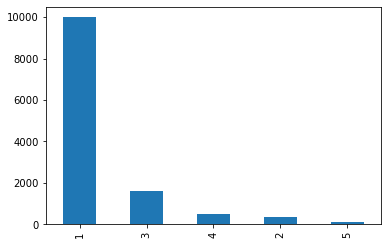

In [67]:
df_final[target].value_counts().sort_values(ascending=False).plot(kind='bar')

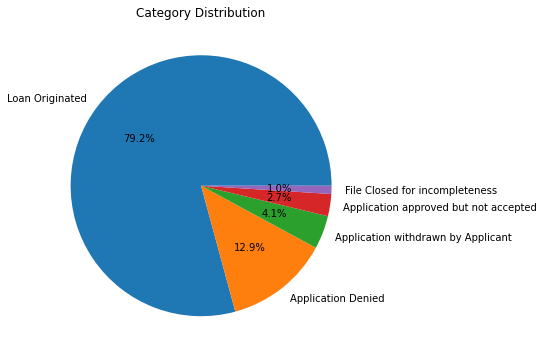

In [73]:
a = df_final[target].value_counts().sort_values(ascending=False)
my_labels = ['Loan Originated','Application Denied','Application withdrawn by Applicant','Application approved but not accepted', 'File Closed for incompleteness']
plt.figure(figsize=(6,6))
plt.pie(a,labels=my_labels,autopct='%1.1f%%')
plt.title('Category Distribution')
plt.show()

From the above graphs we can analyse the following distributions:
    * 79.2% of records belong to category-1 (Loan Originated)
    * 12.9% of the records where Application is denied
    * Only 4.1% of the customers withdrew their loan application
    * Only 2.7% of the customers application did not get approved due to some reason.
    * 1% of the Applications are closed and rejected on spot due to incomplete data.
    
    
From the above data, we can clearly find out that we have an imbalanced dataset. That is distribution of every category in the target variable are not balanced and has a lot of variations in the data structure. So, for this we can use some kind of Imbalnce Handling techniques like SMOTE for creating a balnce in the data.

### Correlations in Data

Since, we cannot use all the columns in the dataset for training your model because all the columns in your data will not add any information for proper training of your model. So, our priority is to remove the features that are not adding any value in improving our model accuracy. For this we can use many methods. But now, let use use correlation function to see which features are highly correlated to the target variable.

In [95]:
df_final['total_units']=df_final['total_units'].astype('str')
df_final['total_units'].replace(to_replace='44340', value='>149', inplace=True)

In [101]:
df_final.corr()

,derived_msa-md,county_code,loan_type,loan_purpose,lien_status,open-end_line_of_credit,business_or_commercial_purpose,loan_amount,loan_to_value_ratio,interest_rate,...,applicant_credit_score_type,co-applicant_credit_score_type,denial_reason-1,tract_population,tract_minority_population_percent,ffiec_msa_md_median_family_income,tract_to_msa_income_percentage,tract_owner_occupied_units,tract_one_to_four_family_homes,tract_median_age_of_housing_units
derived_msa-md,1.000000,-0.049871,0.162466,-0.099079,-0.056862,0.079036,0.007037,-0.040315,0.066483,0.111587,...,-0.032533,0.031027,0.043615,-0.064588,-0.015694,-0.524080,0.006354,-0.063534,0.033681,0.008904
county_code,-0.049871,1.000000,0.167916,-0.194410,-0.108487,0.089711,-0.009089,-0.037479,0.135892,0.089940,...,-0.094261,-0.021334,0.127960,-0.290988,-0.338522,0.365932,-0.042086,-0.245639,-0.272337,0.436445
loan_type,0.162466,0.167916,1.000000,-0.246313,-0.158678,0.173626,0.020827,-0.032057,0.348494,0.137506,...,-0.094105,0.070629,0.161215,-0.089604,-0.100992,-0.067076,-0.146100,-0.090915,-0.060659,0.156375
loan_purpose,-0.099079,-0.194410,-0.246313,1.000000,0.080670,-0.191893,-0.041181,0.006513,-0.279482,-0.228925,...,0.074900,-0.044347,-0.271245,0.137834,0.127940,-0.080081,0.105503,0.107451,0.099560,-0.159261
lien_status,-0.056862,-0.108487,-0.158678,0.080670,1.000000,-0.651660,0.007308,-0.378574,-0.130608,-0.160916,...,0.035821,-0.024444,-0.225155,0.065534,0.056975,-0.047006,0.129934,0.057327,0.035933,-0.078077
open-end_line_of_credit,0.079036,0.089711,0.173626,-0.191893,-0.651660,1.000000,-0.004829,0.328899,0.331632,0.404111,...,-0.071022,0.024178,0.234689,-0.048480,-0.049117,0.030968,-0.132902,-0.045926,-0.020145,0.061225
business_or_commercial_purpose,0.007037,-0.009089,0.020827,-0.041181,0.007308,-0.004829,1.000000,-0.113989,0.053241,-0.157560,...,-0.187485,-0.038962,-0.008808,0.013790,-0.019884,-0.008259,0.028686,0.031071,0.019872,-0.037904
loan_amount,-0.040315,-0.037479,-0.032057,0.006513,-0.378574,0.328899,-0.113989,1.000000,0.184623,0.007474,...,0.026043,-0.109092,0.088009,0.055672,0.041642,0.115291,0.258235,0.049872,0.011164,-0.170904
loan_to_value_ratio,0.066483,0.135892,0.348494,-0.279482,-0.130608,0.331632,0.053241,0.184623,1.000000,0.261396,...,0.066855,0.092455,0.009095,-0.038608,-0.015147,0.045538,-0.135310,-0.061333,-0.041438,0.142816
interest_rate,0.111587,0.089940,0.137506,-0.228925,-0.160916,0.404111,-0.157560,0.007474,0.261396,1.000000,...,0.014497,0.036964,0.039790,-0.062041,-0.048889,-0.011657,-0.130531,-0.061300,-0.031549,0.102339


### Categorizing the data

Since, our data has a lot of variations in the features which can drastically improve the variance of our dataset when compared with the target variable. So, we generally perform **Binning** or **Quantile Binning** process to customize the data features.

In [102]:
df_final['income'] = pd.qcut(df_final['income'], q=4, labels=["0-60","61-90","91-130",">130"])
df_final['tract_population'] = pd.cut(df_final['tract_population'], bins=5, labels=["0-10000","10001-20000","20001-30000","30001-40000",">40000"])
df_final['tract_minority_population_percent'] = pd.cut(df_final['tract_minority_population_percent'], bins=5, labels=["0-20%","20-40%","41-60%","61-80%","81-100%"])
df_final['tract_owner_occupied_units'] = pd.qcut(df_final['tract_owner_occupied_units'], q=5,labels = ["0 - 850","851-1200","1201-1600","1601-2100",">2100"])
df_final['ffiec_msa_md_median_family_income'] = pd.cut(df_final['ffiec_msa_md_median_family_income'], bins=5, labels = ["45000-60000","60001-80000","80001-100000","100001-120000",">120000"])
df_final['tract_median_age_of_housing_units'] = pd.cut(df_final['tract_median_age_of_housing_units'], bins=5, labels = ["0 - 15","15-30","31-45","46-60",">60"])
df_final['loan_amount'] = pd.qcut(df_final['loan_amount'], q=6, labels = ["4999-85000","85001-135000","135001-185000","185001-235000","235001-305000","305001-500000"])
df_final['loan_to_value_ratio'] = pd.qcut(df_final['loan_to_value_ratio'], q=4, labels = ["0-79","80-89","90-95",">95"])
df_final['rate_spread'] = pd.qcut(df_final['rate_spread'], q=5, labels=["-3.03 to -0.088", "-0.089 to 0.17", "0.17 to 0.195","0.195 to 0.729", "0.729 to 2.967"])
df_final['loan_term'] = pd.cut(df_final['loan_term'], bins=6, labels=["11-71","72-130","131-190","191-250","251-310",">310"])
df_final['property_value'] = pd.qcut(df_final['property_value'], q=7, labels=["34K-145K","146K-195K","196K-245K","246K-255K","256K-315K","316K-415K",">415K"])

### Encoding the Data

In [108]:
def data_encoding( encoding_strategy , encoding_data , encoding_columns ):
    
    if encoding_strategy == "LabelEncoding":
        print("IF LabelEncoding")
        Encoder = LabelEncoder()
        for column in encoding_columns :
            print("column",column )
            encoding_data[ column ] = Encoder.fit_transform(tuple(encoding_data[ column ]))
        
    elif encoding_strategy == "OneHotEncoding":
        print("ELIF OneHotEncoding")
        encoding_data = pd.get_dummies(encoding_data)
        
    dtypes_list =['float64','float64']
    encoding_data.astype(dtypes_list[0]).dtypes
    
    return encoding_data

In [109]:
category_cols = df_final.select_dtypes(['object','category'])
encoding_strategy = ['LabelEncoding','OneHotEncoding']
encode_cols = category_cols.columns
encode_cols

Index(['state_code', 'conforming_loan_limit', 'derived_loan_product_type',
       'derived_dwelling_category', 'action_taken', 'loan_amount',
       'loan_to_value_ratio', 'rate_spread', 'loan_term', 'property_value',
       'total_units', 'income', 'debt_to_income_ratio', 'tract_population',
       'tract_minority_population_percent',
       'ffiec_msa_md_median_family_income', 'tract_owner_occupied_units',
       'tract_median_age_of_housing_units'],
      dtype='object')

In [110]:
train_new = data_encoding(encoding_strategy[0], df_final, encode_cols)

IF LabelEncoding
column state_code
column conforming_loan_limit
column derived_loan_product_type
column derived_dwelling_category
column action_taken
column loan_amount
column loan_to_value_ratio
column rate_spread
column loan_term
column property_value
column total_units
column income
column debt_to_income_ratio
column tract_population
column tract_minority_population_percent
column ffiec_msa_md_median_family_income
column tract_owner_occupied_units
column tract_median_age_of_housing_units


In [117]:
features = [x for x in train_new if x not in 'action_taken']

In [118]:
train_new[features].shape

(12603, 37)

In [121]:
train_new[target].value_counts()

4    9985
1    1624
2     521
0     345
3     128
Name: action_taken, dtype: int64

In [123]:
x = train_new[features]
y=train_new[target]

### Handling Imbalanced Data

A problem with imbalanced classification is that there are too few examples of the minority class for a model to effectively learn the decision boundary. One way to solve this problem is to oversample the examples in the minority class. This can be achieved by simply duplicating examples from the minority class in the training dataset prior to fitting a model. This can balance the class distribution but does not provide any additional information to the model.

An improvement on duplicating examples from the minority class is to synthesize new examples from the minority class. This is a type of data augmentation for tabular data and can be very effective.

### SMOTE (Synthetic Minority Oversampling Technique)

SMOTE works by selecting examples that are close in the feature space, drawing a line between the examples in the feature space and drawing a new sample at a point along that line. Specifically, a random example from the minority class is first chosen. Then k of the nearest neighbors for that example are found (typically k=5). A randomly selected neighbor is chosen and a synthetic example is created at a randomly selected point between the two examples in feature space.

In [131]:
smt = SMOTE()
x_train_sm, y_train_sm = smt.fit_resample(x, y)

In [141]:
x_train_sm.shape, y_train_sm.shape

((49925, 37), (49925,))

### Train-Test-Split

In [155]:
X_train, X_test, y_train, y_test = train_test_split(x_train_sm,y_train_sm, test_size=0.2, random_state=1)

### Feature Selection

The goal of feature selection in machine learning is to find the best set of features that allows one to build useful models of studied phenomena.

The following are some of the benefits of automatic feature selection before modeling the data are:

* Performing feature selection before data modeling will reduce the overfitting.

* Performing feature selection before data modeling will increases the accuracy of ML model.

* Performing feature selection before data modeling will reduce the training time

#### Principal Component Analysis

PCA is the most important technique used for feature selection in any model. Pre-Requisite for this PCA is to standardize the dataset.

In [158]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

Text(0, 0.5, 'Cumulative explained variance')

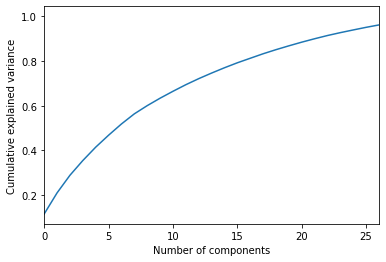

In [179]:
from sklearn.decomposition import PCA
pca = PCA().fit(X_train_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,26,1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

In [180]:
from sklearn.decomposition import PCA 
pca = PCA(n_components=26)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.fit_transform(X_test_std)

In [181]:
X_train_pca.shape, X_test_pca.shape

((39940, 26), (9985, 26))

In [183]:
train_new.columns

Index(['derived_msa-md', 'state_code', 'county_code', 'conforming_loan_limit',
       'derived_loan_product_type', 'derived_dwelling_category',
       'action_taken', 'loan_type', 'loan_purpose', 'lien_status',
       'open-end_line_of_credit', 'business_or_commercial_purpose',
       'loan_amount', 'loan_to_value_ratio', 'interest_rate', 'rate_spread',
       'hoepa_status', 'loan_term', 'interest_only_payment', 'balloon_payment',
       'property_value', 'construction_method', 'occupancy_type',
       'manufactured_home_secured_property_type',
       'manufactured_home_land_property_interest', 'total_units', 'income',
       'debt_to_income_ratio', 'applicant_credit_score_type',
       'co-applicant_credit_score_type', 'denial_reason-1', 'tract_population',
       'tract_minority_population_percent',
       'ffiec_msa_md_median_family_income', 'tract_to_msa_income_percentage',
       'tract_owner_occupied_units', 'tract_one_to_four_family_homes',
       'tract_median_age_of_housing_u

### Choosing Features after Feature Selection

In [185]:
cols = ['conforming_loan_limit','loan_type','lien_status','loan_amount','income','loan_to_value_ratio','derived_dwelling_category','tract_population','business_or_commercial_purpose','hoepa_status','occupancy_type','derived_loan_product_type', 'open-end_line_of_credit','applicant_credit_score_type']
x_train_sm[cols].shape,y_train_sm.shape

((49925, 14), (49925,))

In [186]:
x_train_model, x_test_model, y_train_model, y_test_model = train_test_split(x_train_sm[cols],y_train_sm, test_size=0.2, random_state=1)

# Model Selection

### 1. Decision Tree Classifier

In [189]:
dt = DecisionTreeClassifier(random_state=1)
  
# train the model on train set
dt.fit(x_train_model, y_train_model.ravel())
  
predictions = dt.predict(x_test_model)
  
# print classification report
print(classification_report(y_test_model, predictions))

              precision    recall  f1-score   support

           0       0.71      0.81      0.76      1981
           1       0.78      0.67      0.72      1978
           2       0.64      0.60      0.62      1958
           3       0.63      0.67      0.65      2010
           4       1.00      1.00      1.00      2058

    accuracy                           0.75      9985
   macro avg       0.75      0.75      0.75      9985
weighted avg       0.75      0.75      0.75      9985



### 2. Random Forest Classifier

In [188]:
rf = RandomForestClassifier(n_estimators=200, random_state=1)
  
# train the model on train set
rf.fit(x_train_model, y_train_model.ravel())
  
predictions = rf.predict(x_test_model)
  
# print classification report
print(classification_report(y_test_model, predictions))

              precision    recall  f1-score   support

           0       0.72      0.81      0.76      1981
           1       0.79      0.68      0.73      1978
           2       0.64      0.59      0.61      1958
           3       0.63      0.68      0.65      2010
           4       1.00      1.00      1.00      2058

    accuracy                           0.75      9985
   macro avg       0.75      0.75      0.75      9985
weighted avg       0.76      0.75      0.75      9985



### 2. XG Boost Classifier

In [191]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
xgb = XGBClassifier(learning_rate =0.1, n_estimators=100)
  
# train the model on train set
xgb.fit(x_train_model, y_train_model.ravel())
  
predictions = xgb.predict(x_test_model)
  
# print classification report
print(classification_report(y_test_model, predictions))

[18:11:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.71      0.79      0.75      1981
           1       0.76      0.68      0.72      1978
           2       0.63      0.60      0.61      1958
           3       0.63      0.66      0.64      2010
           4       1.00      1.00      1.00      2058

    accuracy                           0.75      9985
   macro avg       0.75      0.75      0.74      9985
weighted avg       0.75      0.75      0.75      9985



### Save the Model to Disk

In [197]:
# Saving model to disk
pickle.dump(rf, open('model.pkl','wb'))

# Loading model to compare the results
model = pickle.load(open('model.pkl','rb'))

In [200]:
x_train_model.columns

Index(['conforming_loan_limit', 'loan_type', 'lien_status', 'loan_amount',
       'income', 'loan_to_value_ratio', 'derived_dwelling_category',
       'tract_population', 'business_or_commercial_purpose', 'hoepa_status',
       'occupancy_type', 'derived_loan_product_type',
       'open-end_line_of_credit', 'applicant_credit_score_type'],
      dtype='object')

In [204]:
x_train_model['loan_to_value_ratio'].value_counts()

1    24540
0     9072
2     3920
3     2408
Name: loan_to_value_ratio, dtype: int64